## Imports

In [1]:
import itertools
import math
import nltk
from collections import Counter

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

from prettytable import PrettyTable

from pprint import *

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bby0537\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Initial Observations

In [2]:
adidas = pd.read_csv("data/adidas_merged_cleaned.csv", index_col = 0)

print("Basic information about our Adidas' footwear dataset:\n")
print(adidas.info())
print(adidas.describe())
display(adidas.head(3))

Basic information about our Adidas' footwear dataset:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2390 entries, 0 to 2389
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          2389 non-null   object 
 1   subtitle       2360 non-null   object 
 2   num_colors     2390 non-null   object 
 3   url            2390 non-null   object 
 4   price          2386 non-null   object 
 5   reduced_price  2246 non-null   object 
 6   description    2368 non-null   object 
 7   details        2248 non-null   object 
 8   colors         1945 non-null   object 
 9   n_reviews      2180 non-null   float64
 10  avg_stars      2180 non-null   float64
 11  product_code   2390 non-null   object 
dtypes: float64(2), object(10)
memory usage: 242.7+ KB
None
          n_reviews    avg_stars
count   2180.000000  2180.000000
mean     841.304128     4.578578
std     2402.486479     0.361305
min        1.000000     1.0000

,title,subtitle,num_colors,url,price,reduced_price,description,details,colors,n_reviews,avg_stars,product_code
0,Start Your Run Shoes,Women's Running,4 colors,/us/start-your-run-shoes/GY9233.html,$65,$33,You'll want these adidas running shoes the nex...,Regular fit; Lace closure; Textile upper; LIGH...,Dash Grey / Matte Silver / Core Black,5.0,4.8,GY9233
1,NMD_R1 Shoes,Youth Originals,1,/us/nmd_r1-shoes/H03994.html,$130,$91,"One shoe to rule them all. School, work or kic...",Regular fit; Lace closure; Mesh upper; Boost m...,NaN,131.0,4.6,H03994
2,Edge Lux Shoes,Women's Training,5 colors,/us/edge-lux-shoes/GZ6741.html,$90,$45,"Comfort is key, whether you're racing to catch...",Women's-specific fit; Lace closure; Textile up...,Core Black / Core Black / Iron Metallic,191.0,4.0,GZ6741


## Grouping categories in subtitle

In [3]:
pprint(list(adidas['subtitle'].unique()))

["Women's Running",
 'Youth Originals',
 "Women's Training",
 'Sportswear',
 "Men's Sportswear",
 "Men's Essentials",
 "Women's Sportswear",
 "Women's Originals",
 "Women's • Essentials",
 "Women's • Originals",
 "Women's • Running",
 "Women's • Sportswear",
 "Men's • Essentials",
 'Originals',
 "Men's • Running",
 "Men's • Originals",
 'Kids Unisex • Originals',
 'Running',
 'Kids Unisex • Sportswear',
 'Yoga',
 'Essentials',
 "Men's • Sportswear",
 'Kids Unisex • Essentials',
 'Children Essentials',
 "Men's • TERREX",
 "Women's TERREX",
 'Basketball',
 "Men's Soccer",
 'Swim',
 "Men's TERREX",
 "Women's Essentials",
 "Men's Running",
 'Infant & Toddler Training',
 'Kids Unisex • TERREX',
 "Women's • Basketball",
 "Women's • Training",
 "Men's • Five Ten",
 'Kids Unisex • Lifestyle',
 "Women's • Swim",
 "Women's • adidas by Stella McCartney",
 'Cycling',
 "Men's • Soccer",
 "Women's • TERREX",
 'Soccer',
 "Men's Originals",
 'Children Sportswear',
 'Kids Essentials',
 'Infant & Toddle

In [4]:
adidas = adidas.replace({'subtitle' : { 'Shoe' : "Men's Shoe", "Men's Shoes" : "Men's Shoe"}})
adidas = adidas.replace({'subtitle' : { ".+Running.+" : "Running Shoe"}}, regex = True)
adidas = adidas.replace({'subtitle' : { ".+Basketball.+" : "Basketball Shoe"}}, regex = True)
adidas = adidas.replace({'subtitle' : { "Basketball.+" : "Basketball Shoe"}}, regex = True)
adidas = adidas.replace({'subtitle' : { ".+Baseball.+" : "Baseball Shoe"}}, regex = True)
adidas = adidas.replace({'subtitle' : { "Baseball.+" : "Baseball Shoe"}}, regex = True)
adidas = adidas.replace({'subtitle' : { ".+Hiking.+" : "Hiking Shoe"}}, regex = True)
adidas = adidas.replace({'subtitle' : { "HIIT.+" : "Training Shoe"}}, regex = True)
adidas = adidas.replace({'subtitle' : { ".+Skate.+" : "Skate Shoe"}}, regex = True)
adidas = adidas.replace({'subtitle' : { ".+Football.+" : "Football Shoe"}}, regex = True)
adidas = adidas.replace({'subtitle' : { "Football.+" : "Football Shoe"}}, regex = True)
adidas = adidas.replace({'subtitle' : { ".+Slide.+" : "Sandal"}}, regex = True)
adidas = adidas.replace({'subtitle' : { "Slide" : "Sandal"}}, regex = True)
adidas = adidas.replace({'subtitle' : { ".+Boot.+" : "Boot"}}, regex = True)
adidas = adidas.replace({'subtitle' : { ".+Boot$" : "Boot"}}, regex = True)
adidas = adidas.replace({'subtitle' : { ".+Lacrosse.+" : "Lacrosse Shoe"}}, regex = True)
adidas = adidas.replace({'subtitle' : { "Lacrosse.+" : "Lacrosse Shoe"}}, regex = True)
adidas = adidas.replace({'subtitle' : { ".+Lifestyle.+" : "Lifestyle Shoe"}}, regex = True)
adidas = adidas.replace({'subtitle' : { ".+Cycling.+" : "Cycling Shoe"}}, regex = True)
adidas = adidas.replace({'subtitle' : { ".+Thong.+" : "Sandal"}}, regex = True)
adidas = adidas.replace({'subtitle' : { "Thong" : "Sandal"}}, regex = True)
adidas = adidas.replace({'subtitle' : { ".+Flip Flop.+" : "Sandal"}}, regex = True)
adidas = adidas.replace({'subtitle' : { "Flip Flop" : "Sandal"}}, regex = True)
adidas = adidas.replace({'subtitle' : { "Flip-Flop" : "Sandal"}}, regex = True)
adidas = adidas.replace({'subtitle' : { ".+Sandal.+" : "Sandal"}}, regex = True)
adidas = adidas.replace({'subtitle' : { ".+Sandal" : "Sandal"}}, regex = True)
adidas = adidas.replace({'subtitle' : { ".+Slide" : "Sandal"}}, regex = True)
adidas = adidas.replace({'subtitle' : { "Slip$" : "Sandal"}}, regex = True) 
adidas = adidas.replace({'subtitle' : { "^Slip-On$" : "Sandal"}}, regex = True)
adidas = adidas.replace({'subtitle' : { ".+Softball.+" : "Softball Shoe"}}, regex = True)
adidas = adidas.replace({'subtitle' : { "Softball.+" : "Softball Shoe"}}, regex = True)                
adidas = adidas.replace({'subtitle' : { ".+Golf.+" : "Golf Shoe"}}, regex = True)
adidas = adidas.replace({'subtitle' : { "Golf.+" : "Golf Shoe"}}, regex = True)
adidas = adidas.replace({'subtitle' : { ".+Soccer.+" : "Soccer Shoe"}}, regex = True)
adidas = adidas.replace({'subtitle' : { ".+Tennis.+" : "Tennis Shoe"}}, regex = True)
adidas = adidas.replace({'subtitle' : { ".+Training.+" : "Training Shoe"}}, regex = True)
adidas = adidas.replace({'subtitle' : { "Custom.+" : "Custom Shoe"}}, regex = True)
adidas = adidas.replace({'subtitle' : { "High Top" : "Lifestyle Shoe"}}, regex = True)
adidas = adidas.replace({'subtitle' : { "Lifestyle Shoe \(Extra Wide\)" : "Lifestyle Shoe"}}, regex = True)
adidas = adidas.replace({'subtitle' : { "Print Slide" : "Printed Slide"}}, regex = True)
adidas = adidas.replace({'subtitle' : { "Racing.+" : "Racing Shoe"}}, regex = True)
adidas = adidas.replace({'subtitle' : { "Unisex Racing Shoe" : "Racing Shoe"}}, regex = True)
adidas = adidas.replace({'subtitle' : { ".+Track.+" : "Track Shoe"}}, regex = True)
adidas = adidas.replace({'subtitle' : { "^Track Spike$" : "Track Shoe"}}, regex = True)
adidas = adidas.replace({'subtitle' : { "Unisex Shoe" : "Lifestyle Shoe"}}, regex = True)
adidas['subtitle'] = adidas['subtitle'].str.replace("Men's","")
adidas['subtitle'] = adidas['subtitle'].str.replace("Women's","")
adidas['subtitle'] = adidas['subtitle'].str.replace("• ","")
adidas['subtitle'] = adidas['subtitle'].str.strip()
adidas = adidas.replace({'subtitle' : { "^Shoe" : "Lifestyle Shoe"}}, regex = True)
adidas = adidas.replace({'subtitle' : { "Children.+" : "Children Shoe"}}, regex=True)
adidas = adidas.replace({'subtitle' : { "Kids.+" : "Children Shoe"}}, regex=True)
adidas = adidas.replace({'subtitle' : { "Girls.+" : "Children Shoe"}}, regex=True)
adidas = adidas.replace({'subtitle' : { "Boys.+" : "Children Shoe"}}, regex=True)
adidas = adidas.replace({'subtitle' : { "Infant & Toddler.+" : "Children Shoe"}}, regex=True)
adidas = adidas.replace({'subtitle' : { "Youth.+" : "Children Shoe"}}, regex=True)

In [5]:
unique_subtitle = list(adidas['subtitle'].unique())

print(f"There are {len(unique_subtitle)} unique subtitles/categories")
pprint(unique_subtitle)

There are 25 unique subtitles/categories
['Running',
 'Children Shoe',
 'Training',
 'Sportswear',
 'Essentials',
 'Originals',
 'Yoga',
 'TERREX',
 'Basketball',
 'Soccer',
 'Swim',
 'Five Ten',
 'adidas by Stella McCartney',
 'Cycling',
 'Golf',
 nan,
 'Tennis',
 'Y-3',
 'Volleyball',
 'Football',
 'Weightlifting',
 'Track & Field',
 'Baseball',
 'Boxing',
 'Softball']


In [6]:
display(adidas.head(3))

,title,subtitle,num_colors,url,price,reduced_price,description,details,colors,n_reviews,avg_stars,product_code
0,Start Your Run Shoes,Running,4 colors,/us/start-your-run-shoes/GY9233.html,$65,$33,You'll want these adidas running shoes the nex...,Regular fit; Lace closure; Textile upper; LIGH...,Dash Grey / Matte Silver / Core Black,5.0,4.8,GY9233
1,NMD_R1 Shoes,Children Shoe,1,/us/nmd_r1-shoes/H03994.html,$130,$91,"One shoe to rule them all. School, work or kic...",Regular fit; Lace closure; Mesh upper; Boost m...,NaN,131.0,4.6,H03994
2,Edge Lux Shoes,Training,5 colors,/us/edge-lux-shoes/GZ6741.html,$90,$45,"Comfort is key, whether you're racing to catch...",Women's-specific fit; Lace closure; Textile up...,Core Black / Core Black / Iron Metallic,191.0,4.0,GZ6741


## Plot Numeric Variables

In [7]:
# remove $ and convert price to float
adidas['price'] = adidas['price'].str.replace("$",'').str.replace(',','').astype(np.float64)

<ipython-input-7-1adcc68846ab>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  adidas['price'] = adidas['price'].str.replace("$",'').str.replace(',','').astype(np.float64)


In [8]:
adidas['num_colors'] = adidas['num_colors'].str.extract('(\d+)').astype(np.float64)

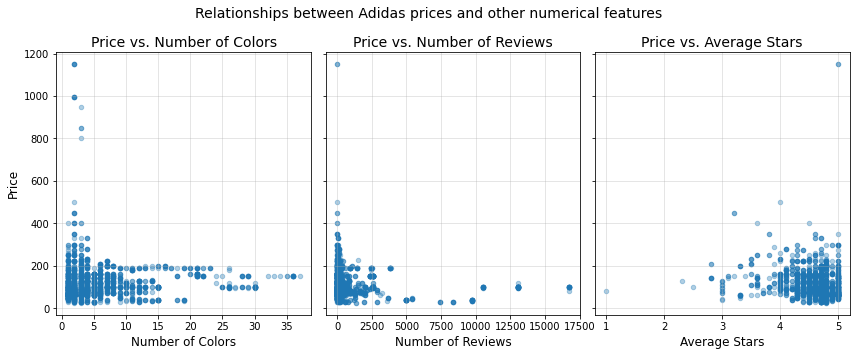

In [9]:
fig, axes = plt.subplots(1, 3, sharey = True, figsize = (12, 5))

fontsize = 14

cols = ["num_colors", "n_reviews", "avg_stars"] 
title_vs_text = ["num_colors", "n_reviews", "avg_stars"]
xlabels = ["Number of Colors", "Number of Reviews", "Average Stars"]

for i, (ax, col, title_vs, xlabel) in enumerate(
            zip(axes, cols, title_vs_text, xlabels) ):

    ax.scatter(adidas[col], adidas["price"], alpha = 0.35, s = 20)
    ax.set_title(f"Price vs. {xlabel}", fontsize = fontsize)
    ax.set_xlabel(xlabel, fontsize = fontsize-2)
    ax.set_ylabel("Price" if i == 0 else None, 
        fontsize = fontsize - 2)
    ax.grid(":", alpha=0.4)

plt.suptitle("Relationships between Adidas prices and other numerical features", 
             fontsize = fontsize)
plt.tight_layout()

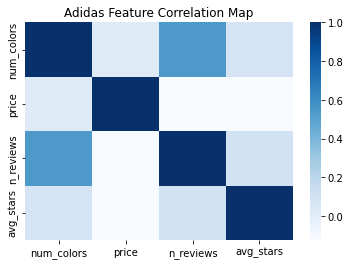

In [10]:
cor = adidas.corr()
sns.heatmap(cor, cmap = 'Blues')
plt.title("Adidas Feature Correlation Map")
plt.show()

## Plot Categorical Variables

In [11]:
top_subtitles = adidas.subtitle.value_counts().head()
top_subtitles # top 5 subtitles

Originals        635
Children Shoe    565
Running          265
Sportswear       151
Essentials       136
Name: subtitle, dtype: int64

In [12]:
adidas_top_subtitles = adidas.loc[adidas.subtitle.isin(top_subtitles.index.tolist())]

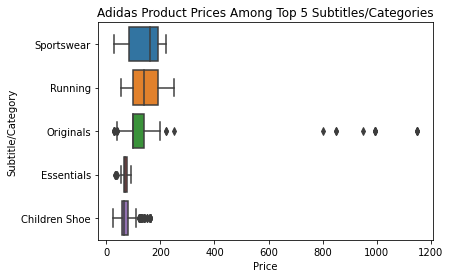

In [13]:
top_subtitles_sorted = adidas_top_subtitles.groupby('subtitle').price.median().sort_values(ascending=False)

# order box plot by median
sns.boxplot(data=adidas_top_subtitles, y='subtitle', x='price', 
            order=top_subtitles_sorted.index)
plt.xlabel('Price')
plt.ylabel('Subtitle/Category')
plt.title('Adidas Product Prices Among Top 5 Subtitles/Categories')
plt.show()

## Numeric Stats

In [14]:
mean_price = adidas["price"].mean() 
mean_noc = adidas["num_colors"].mean()
std_price = adidas["price"].std() 
std_noc = adidas["num_colors"].std()
print(
    "\n"
    f"The mean price is {mean_price:.4f} \n"
    f"The mean number of colors is {mean_noc:.4f} \n"
    f"The Standard Deviation of price is {std_price:.4f}\n"
    f"The Standard Deviation of number of colors is {std_noc:.4f}"
)


The mean price is 119.7339 
The mean number of colors is 5.6943 
The Standard Deviation of price is 87.6957
The Standard Deviation of number of colors is 6.2613


In [15]:
price_min = adidas["price"].min()
price_max = adidas["price"].max() 
price_range = price_max - price_min 

print(
    f"The range of price for which shoes in our dataset "
    f"is {price_range:,.2f} dolloars. \n\n"
    f"The maximum number of price is {price_max:,.2f}, "
    f"and the minimum is {price_min:,.2f}."
)

The range of price for which shoes in our dataset is 1,125.00 dolloars. 

The maximum number of price is 1,150.00, and the minimum is 25.00.


<ipython-input-16-1203f11264af>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adidas['price'], color='orange')


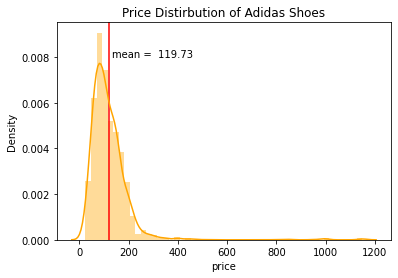

In [16]:
plt.figure(figsize=(6,4))
#ploting the mean
plt.axvline(mean_price, 0, 1, color = 'red')
sns.distplot(adidas['price'], color='orange')
plt.text(mean_price * 1.1, 0.008, f'mean = {mean_price: .2f}', fontsize=10)
plt.title("Price Distirbution of Adidas Shoes")
plt.show()

## Missing Data

In [17]:
# number of missing values in each column
adidas.isna().sum()

title              1
subtitle          30
num_colors        28
url                0
price              4
reduced_price    144
description       22
details          142
colors           445
n_reviews        210
avg_stars        210
product_code       0
dtype: int64

In [18]:
adidas.loc[adidas['price'].isna()]

,title,subtitle,num_colors,url,price,reduced_price,description,details,colors,n_reviews,avg_stars,product_code
369,NaN,NaN,1.0,/us/originals-flex-shoes/GX9260.html,NaN,NaN,They'll be getting comfy in style with these k...,Regular fit; Elastic laces; Mesh upper with sy...,Cloud White / Almost Blue / Blue Bird,2.0,5.0,GX9260
2166,Forum 84 Low Shoes,Originals,3.0,/us/forum-84-low-shoes/GZ8959.html,NaN,NaN,'80s B-ball lives on in these adidas Forum sho...,Lace closure with ankle strap; Leather upper; ...,Off White / Scarlet / Collegiate Royal,NaN,NaN,GZ8959
2167,Ultraboost DNA Shoes,Sportswear,3.0,/us/ultraboost-dna-shoes/GZ0689.html,NaN,NaN,There's always a new route to explore. A new p...,Regular fit; Lace closure; Knit textile upper;...,Blue Rush / Blue Rush / Bliss Blue,NaN,NaN,GZ0689
2168,Forum Low Shoes,Originals,8.0,/us/forum-low-shoes/G58002.html,NaN,NaN,There's no substitute for the real thing. Thes...,Lace closure with adjustable strap; Leather up...,Cloud White / Cloud White / Shock Pink,NaN,NaN,G58002


### Filling missing price entries

In [19]:
from time import sleep
from selenium import webdriver
from bs4 import BeautifulSoup

def get_title(page):
    title = page.find(attrs = {"data-testid": "product-title"})
    if title is None:
        return None
    return title.text

def get_subtitle(page):
    subtitle = page.find(attrs = {"data-auto-id": "product-category"})
    if subtitle is None:
        return None
    return subtitle.text
                               
def get_count(page):
    # Number of colors
    # e.g. "2 Colors"
    num_colors = page.select_one("#available-colors-label")
    if num_colors is None:
        return None
    num_colors = num_colors.text.replace(" available", "")
    return num_colors  
                               
def get_price(page):
    pricetag = page.select(".product-description___1TLpA .product-price___2Mip5 .price-wrapper___2Pj9R .gl-price .gl-price-item")
    return [p.text for p in pricetag] # usually starts with [original, sale]
    # may need to double check the order
    
def get_reviews(page):
    review_section = page.select_one("#navigation-target-reviews")
    if review_section is None:
        return None, None
    review_title = review_section.select_one('.gl-accordion__header .gl-accordion__title')
    if review_title:
        review_title = review_title.text
        n_reviews = review_title[review_title.index('(') + 1 : review_title.index(')')]
        avg_stars = review_section.find(attrs = {'data-auto-id': 
                                    'ratings-reviews'})
        if avg_stars:
            avg_stars = avg_stars.select_one('.out-of-5___i5A3q')
        if avg_stars:
            return n_reviews, avg_stars.text
        else:
            return n_reviews, None
    else:
        return None, None
                               
def get_page(url):
    driver = webdriver.Chrome()
    driver.get(url)
    sleep(1)
    soup = BeautifulSoup(driver.page_source, "html.parser")
    driver.close()
    return soup

def fill_na(row):
    soup = get_page('https://www.adidas.com' + row['url'])
    title = get_title(soup) if pd.isna(row['title']) else None
    subtitle = get_subtitle(soup) if pd.isna(row['subtitle']) else None
    price = get_price(soup)
    n_reviews, avg_stars = get_reviews(soup)
    return title, subtitle, price, n_reviews, avg_stars

price_na = adidas.loc[adidas['price'].isna()]

for index, row in price_na.iterrows():
    title, subtitle, price, n_reviews, avg_stars = fill_na(row)
    print("Filling obs:", title, subtitle, price, n_reviews, avg_stars)
    if title is not None:
        adidas.loc[index, 'title'] = title
    if subtitle is not None:
        adidas.loc[index, 'subtitle'] = subtitle
    adidas.loc[index, 'price'] = int(price[0].replace("$", ""))
    adidas.loc[index, 'reduced_price'] = int(price[1].replace("$", ""))
    adidas.loc[index, 'n_reviews'] = n_reviews
    adidas.loc[index, 'avg_stars'] = avg_stars

Filling obs: Originals Flex Shoes Kids Unisex • Originals ['$65', '$65'] 5 4.6
Filling obs: None None ['$100', '$60', '$100', '$60'] None None
Filling obs: None None ['$180', '$180'] None None
Filling obs: None None ['$90', '$63', '$90', '$63'] None None


In [20]:
adidas.isna().sum()

title              0
subtitle          29
num_colors        28
url                0
price              0
reduced_price    140
description       22
details          142
colors           445
n_reviews        210
avg_stars        210
product_code       0
dtype: int64

### Filling missing entries for num_colors, n_reviews, avg_stars with their median values

In [21]:
adidas['num_colors'].fillna(adidas['num_colors'].median(), inplace = True)
adidas['n_reviews'].fillna(adidas['n_reviews'].median(), inplace = True)
adidas['avg_stars'].fillna(adidas['avg_stars'].median(), inplace = True)

# Simple Linear Regressions and MSE/R2 

In [22]:
mse_list = []
r2_list = []
# List of all predictor combinations to fit the curve
predictors_list = [['num_colors'], ['n_reviews'], ['avg_stars'],
        ['num_colors','n_reviews'], 
        ['avg_stars','n_reviews'],
        ['num_colors','avg_stars'],
        ['num_colors','n_reviews','avg_stars']]

In [23]:
# Loop over all the predictor combinations 
for predictors in predictors_list:
    x = adidas[predictors]
    y = adidas['price']
   
    # Split the data into train-test sets with 80% training data and 20% testing data. 
    # Set random_state as 0
    x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                        train_size = .8,
                                                        random_state = 0)
    # Fits a Linear Regression model
    lreg = LinearRegression().fit(x_train,y_train)

    # Predicts the response variable for the test set using the trained model
    y_pred= lreg.predict(x_test)
    
    # Computes and records the MSE ad R squared on the test data
    mse_list.append(mean_squared_error(y_test, y_pred))
    r2_list.append(r2_score(y_test, y_pred))

In [24]:
eval_table = PrettyTable(['Adidas Predictors', 'MSE', 'R2 score'])
for i in range(len(mse_list)):
    eval_table.add_row([predictors_list[i],round(mse_list[i], 2), round(r2_list[i], 2)])

print(eval_table)

+------------------------------------------+---------+----------+
|            Adidas Predictors             |   MSE   | R2 score |
+------------------------------------------+---------+----------+
|              ['num_colors']              | 8636.39 |   -0.0   |
|              ['n_reviews']               | 8560.68 |   0.01   |
|              ['avg_stars']               | 8710.49 |  -0.01   |
|       ['num_colors', 'n_reviews']        | 8488.18 |   0.02   |
|        ['avg_stars', 'n_reviews']        | 8628.25 |   0.0    |
|       ['num_colors', 'avg_stars']        | 8709.16 |  -0.01   |
| ['num_colors', 'n_reviews', 'avg_stars'] |  8559.9 |   0.01   |
+------------------------------------------+---------+----------+


# Sentiment Analysis

In [25]:
# copy adidas df to work on
df = adidas.loc[:, ['subtitle', 'description', 'details', 'price']].copy()
df.dropna(inplace = True)

In [26]:
# combine description and details columns
df['description'] = df['description'] + ' ' + df['details']
df.drop(columns = ['details'], inplace = True)

In [27]:
analyzer = SIA()
# using sentiment analysis and get negative, neutral, poisitve scores on columns "rating"
df['rating'] = df['description'].apply(analyzer.polarity_scores)
df.head()

,subtitle,description,price,rating
0,Running,You'll want these adidas running shoes the nex...,65.0,"{'neg': 0.023, 'neu': 0.864, 'pos': 0.113, 'co..."
1,Children Shoe,"One shoe to rule them all. School, work or kic...",130.0,"{'neg': 0.0, 'neu': 0.835, 'pos': 0.165, 'comp..."
2,Training,"Comfort is key, whether you're racing to catch...",90.0,"{'neg': 0.024, 'neu': 0.867, 'pos': 0.108, 'co..."
3,Sportswear,Classics for a reason. These adidas slides are...,40.0,"{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'comp..."
4,Sportswear,It doesn't really matter whether or not a run ...,85.0,"{'neg': 0.018, 'neu': 0.938, 'pos': 0.044, 'co..."


In [28]:
# change each keys/values of dictionary in column rating, to be the new columns of dataframe
df_sentiment = pd.concat([df.drop(['rating'], axis=1), df['rating'].apply(pd.Series)], axis=1)
df_sentiment.head()

,subtitle,description,price,neg,neu,pos,compound
0,Running,You'll want these adidas running shoes the nex...,65.0,0.023,0.864,0.113,0.8316
1,Children Shoe,"One shoe to rule them all. School, work or kic...",130.0,0.000,0.835,0.165,0.9118
2,Training,"Comfort is key, whether you're racing to catch...",90.0,0.024,0.867,0.108,0.7717
3,Sportswear,Classics for a reason. These adidas slides are...,40.0,0.000,0.805,0.195,0.9538
4,Sportswear,It doesn't really matter whether or not a run ...,85.0,0.018,0.938,0.044,0.4232


In [29]:
df_sentiment['score'] = np.where(df_sentiment['compound'] < 0, 'negative', 'positive')
df_sentiment.head()

,subtitle,description,price,neg,neu,pos,compound,score
0,Running,You'll want these adidas running shoes the nex...,65.0,0.023,0.864,0.113,0.8316,positive
1,Children Shoe,"One shoe to rule them all. School, work or kic...",130.0,0.000,0.835,0.165,0.9118,positive
2,Training,"Comfort is key, whether you're racing to catch...",90.0,0.024,0.867,0.108,0.7717,positive
3,Sportswear,Classics for a reason. These adidas slides are...,40.0,0.000,0.805,0.195,0.9538,positive
4,Sportswear,It doesn't really matter whether or not a run ...,85.0,0.018,0.938,0.044,0.4232,positive


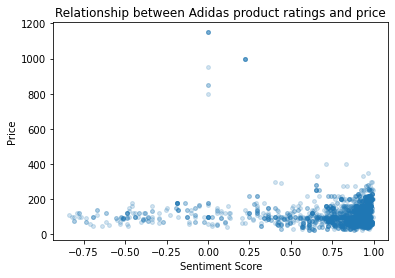

In [30]:
plt.figure(figsize = (6,4))
plt.scatter(df_sentiment['compound'], df_sentiment["price"], alpha = 0.2, s = 15)
plt.xlabel("Sentiment Score")
plt.ylabel("Price")
plt.title("Relationship between Adidas product ratings and price")
plt.show()

# Just for the nagative score description

In [31]:
positive_des = (df_sentiment['score'] == 'positive').sum()
negative_des = (df_sentiment['score'] == 'negative').sum()
print(f"There are {positive_des} positive descriptions and {negative_des} negative descriptions.")

There are 2066 positive descriptions and 133 negative descriptions.


In [32]:
neg = df_sentiment[df_sentiment['score']=='negative']
neg.head()

,subtitle,description,price,neg,neu,pos,compound,score
9,Essentials,These adidas sneakers are tasteful and minimal...,60.0,0.076,0.882,0.042,-0.4902,negative
31,Originals,"When worlds collide, magic happens. These adid...",70.0,0.024,0.976,0.000,-0.0772,negative
37,Originals,Millions of people have laced into adidas Stan...,100.0,0.078,0.887,0.036,-0.8176,negative
47,Originals,"Remember the epic shots, close games and fierc...",110.0,0.026,0.952,0.022,-0.0772,negative
84,Originals,"In the 2000s, the internet was slow and phones...",100.0,0.111,0.825,0.064,-0.7684,negative


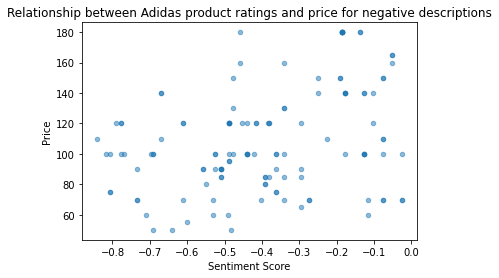

In [33]:
plt.figure(figsize = (6,4))
plt.scatter(neg['compound'], neg["price"], alpha = 0.5, s = 20)
plt.xlabel("Sentiment Score")
plt.ylabel("Price")
plt.title("Relationship between Adidas product ratings and price for negative descriptions")
plt.show()

This approach is not appropriate since assigning the description columns as a numerical varialbe does not help in telling the pattern of prices.

# NLP Analysis

Combine `description` and `details` columns

In [34]:
adidas['details'].fillna('', inplace = True)
adidas['description'] = adidas['description'] + ' ' + adidas['details']

In [35]:
df_desc = adidas.loc[:, ['description', 'price']].copy()  # subset
df_desc.dropna(inplace = True)  # dropna
df_desc.head()

,description,price
0,You'll want these adidas running shoes the nex...,65.0
1,"One shoe to rule them all. School, work or kic...",130.0
2,"Comfort is key, whether you're racing to catch...",90.0
3,Classics for a reason. These adidas slides are...,40.0
4,It doesn't really matter whether or not a run ...,85.0


In [36]:
df_desc['description'] = df_desc['description'].str.lower()
df_desc['description'] = df_desc['description'].str.replace(r'([^\w\s]|_)+', '', regex=True)
df_desc['description'] = df_desc['description'].str.split()
stopwords = pd.read_csv('data/stopwords_nopunc.csv').stopwords.values
df_desc['description'] = df_desc['description'].apply(lambda x: [str(w) for w in x if w not in stopwords])
vocab_counts = df_desc['description'].explode().value_counts()
min_count = 5
vocab = [k for k,v in vocab_counts.items() if v >= 5]
print(f"There are {len(vocab):,} unique words in a reduced, corpus vocabulary for Adidas dataset.")

There are 2,654 unique words in a reduced, corpus vocabulary for Adidas dataset.


In [37]:
# vectorization methods
df_desc['description'] = df_desc['description'].apply(lambda x: [w for w in x if w in vocab])
counts = df_desc['description'].apply(Counter).to_list()
bow_df = pd.DataFrame(counts).fillna(0).astype(int)
bow_df

,want,adidas,running,shoes,next,time,step,route,classic,lines,...,empty,primeweave,hellcat,cliplesscompatible,leatherfree,triplelayer,extension,sixcleat,innings,agile
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2364,0,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2365,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2366,0,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


bin price into 5 discrete brackets

In [38]:
df_desc.reset_index(drop = True, inplace = True)
df_processed = pd.concat([bow_df, df_desc['price']], axis = 1)

In [39]:
# check default percentile cut
pd.cut(df_processed.price, bins = 5).value_counts()

(23.875, 250.0]    2306
(250.0, 475.0]       48
(925.0, 1150.0]      10
(700.0, 925.0]        3
(475.0, 700.0]        1
Name: price, dtype: int64

The above cuts are extremely imbalanced. Manual cuts are performed based on the discretion

In [40]:
# make everything > 200 its only bin
df_processed['is_above_200'] = df_processed.price > 200
df_processed['bracket'] = df_processed.price > 200
df_processed['bracket'].replace(True, 'above_200', inplace=True)
df_processed['bracket'].replace(False, np.nan, inplace=True)

In [41]:
# use default binning for <= 200
binned_low_brackets = pd.cut(df_processed.loc[~df_processed['is_above_200'], 'price'], 
                             bins = 4)
# combine the bins
df_processed['bracket'] = df_processed['bracket'].fillna(binned_low_brackets)
df_processed['price'] = df_processed['bracket']  # .astype('string')

In [42]:
# clean up
df_processed.drop(['is_above_200', 'bracket'], axis = 1, inplace=True)
df_processed.head()

,want,adidas,running,shoes,next,time,step,route,classic,lines,...,primeweave,hellcat,cliplesscompatible,leatherfree,triplelayer,extension,sixcleat,innings,agile,price
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,"(24.825, 68.75]"
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"(112.5, 156.25]"
2,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"(68.75, 112.5]"
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"(24.825, 68.75]"
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"(68.75, 112.5]"


# Naive Bayes

In [43]:
df_processed1 = df_processed.copy()
df_processed1['price'] = df_processed1['price'].astype('string')

In [44]:
X_train, X_test, y_train, y_test = train_test_split(df_processed1.drop('price', axis=1),
                                                    df_processed1['price'], 
                                                    test_size=0.2, 
                                                    random_state=109)

In [45]:
mnb = MultinomialNB().fit(X_train, y_train)
mnb.score(X_test, y_test)

0.7721518987341772

***Feature importance for each class:***

In [46]:
# 5 brackets
y_train.value_counts(sort = False)

(68.75, 112.5]     694
(112.5, 156.25]    419
(24.825, 68.75]    379
(156.25, 200.0]    279
above_200          123
Name: price, dtype: Int64

In [47]:
# get most predictive words for each class (bracket 1 and bracket 3)
feat_imp_list = []

for i in range(len(mnb.classes_)):
    class_prob_sorted = mnb.feature_log_prob_[i, :].argsort()[::-1]
    top_pred_words = np.take(bow_df.columns, class_prob_sorted[:])
    feat_imp_list.append(top_pred_words)

**The top 10 most predictive words for each price bracket:**

In [48]:
# prettify list to df
feat_imp_df = pd.DataFrame(np.array(feat_imp_list).T, columns = mnb.classes_)
feat_imp_df = feat_imp_df.loc[:, y_train.value_counts(sort=False).index]  # reorder columns
feat_imp_df.head(10)

,"(68.75, 112.5]","(112.5, 156.25]","(24.825, 68.75]","(156.25, 200.0]",above_200
0,upper,upper,upper,upper,upper
1,product,product,product,product,product
2,recycled,recycled,recycled,50,adidas
3,outsole,outsole,outsole,midsole,outsole
4,content,50,content,adidas,midsole
5,adidas,midsole,50,recycled,rubber
6,color,shoes,adidas,outsole,color
7,50,adidas,color,boost,imported
8,code,content,code,shoes,code
9,imported,color,imported,plastic,shoes


# Linear Support Vector Machine

In [49]:
sgd = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, 
                    random_state=42, max_iter=5, tol=None)

In [50]:
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.8628691983122363

# Logistic Regression

In [51]:
# TODO: need to find other ways
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy_log = accuracy_score(y_pred, y_test)
accuracy_log

c:\users\bby0537\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.890295358649789

# Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf = RandomForestClassifier(n_estimators=1000, random_state=0).fit(X_train, y_train)
random_forest_train_score = rf.score(X_train, y_train)
random_forest_test_score = rf.score(X_test, y_test)

In [54]:
print(f"random forest test score is {random_forest_test_score}")

random forest test score is 0.869198312236287


In [55]:
top_predictors_rf = df_processed.columns[[dtree.tree_.feature[0] for dtree in rf.estimators_]]
top_predictors_rf = pd.Series(top_predictors_rf).value_counts().sort_values(ascending = False)
top_predictors_rf = pd.DataFrame(top_predictors_rf, columns = ['Count'])
print("Top Predictor Counts - Random Forest")
display(top_predictors_rf)

Top Predictor Counts - Random Forest


,Count
primeknit,20
energy,20
closure,19
ultraboost,18
continental,18
...,...
stretch,1
distance,1
signature,1
enhanced,1


# TFIDF

Term frequency (TF) = (Number of Occurrences of a word)/(Total words in the document)

***Want to calculate each word's TF-IDF score relative to each of the 5 price brackets.***

In [56]:
df_docs = df_processed.groupby('price').sum()
df_docs

,want,adidas,running,shoes,next,time,step,route,classic,lines,...,empty,primeweave,hellcat,cliplesscompatible,leatherfree,triplelayer,extension,sixcleat,innings,agile
price,,,,,,,,,,,,,,,,,,,,,
"(24.825, 68.75]",10,459,85,346,4,41,56,4,76,5,...,0,0,0,0,0,0,0,0,5,0
"(68.75, 112.5]",19,872,160,808,22,62,150,0,136,19,...,0,0,0,0,0,0,6,6,0,0
"(112.5, 156.25]",20,575,139,585,36,57,92,0,42,14,...,5,0,1,1,0,0,0,0,3,0
"(156.25, 200.0]",24,528,151,385,29,70,92,3,39,3,...,0,6,4,4,0,0,0,0,0,10
above_200,3,255,72,135,9,15,34,0,3,0,...,0,0,0,0,8,8,0,0,0,0


***Transform BOW representation into list of documents:***

In [57]:
docs = []  # documents - a list of strings (unique words concatenated for each bracket)

for bracket in df_docs.index:
    row = df_docs.loc[bracket, :]
    # logic: replace nonzero with NA; fill NA with column names; remove unfilled values (counts)
    row[row != 0] = np.nan
    doc = row.astype('string').fillna(row.index.to_series())
    doc = doc.loc[~doc.str.match('.+\..+')].tolist()
    doc = ' '.join(doc)
    docs.append(doc)

# docs[4]  # concatenated unique words for last price bracket

***TF-IDF of each word relative to each price bracket***

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = docs
vectorizer = TfidfVectorizer(use_idf=True)
tfIdf = vectorizer.fit_transform(corpus)
df_tfidf = pd.DataFrame(tfIdf.T.todense(), 
                        index = vectorizer.get_feature_names_out(), 
                        columns = df_docs.index)

df_tfidf

price,"(24.825, 68.75]","(68.75, 112.5]","(112.5, 156.25]","(156.25, 200.0]",above_200
10,0.019663,0.015705,0.016613,0.020058,0.025086
102,0.000000,0.026592,0.000000,0.033962,0.000000
105,0.000000,0.026592,0.000000,0.033962,0.000000
10k,0.000000,0.018569,0.019641,0.023715,0.029660
11,0.000000,0.000000,0.023348,0.028191,0.035258
...,...,...,...,...,...
zero,0.019663,0.015705,0.016613,0.020058,0.025086
zip,0.000000,0.026592,0.000000,0.000000,0.042475
zone,0.019663,0.015705,0.016613,0.020058,0.025086
zones,0.000000,0.018569,0.019641,0.023715,0.029660


***TF-IDF should give us some idea of words that are truly unique to each bracket:***

In [59]:
# check out first bracket's words with top 10 TF-IDF
df_tfidf.iloc[:, 0].sort_values(ascending=False).head(10)

tired             0.041265
reborn            0.041265
seem              0.041265
72                0.041265
stitchedin        0.041265
bigkid            0.041265
star              0.041265
shower            0.041265
showerfriendly    0.041265
showers           0.041265
Name: (24.825, 68.75], dtype: float64

In [60]:
# check out first bracket's words with bottom 10 TF-IDF
df_tfidf.iloc[:, 0].sort_values(ascending=True).head(10)

zx                0.0
fly               0.0
fluid             0.0
refresh           0.0
reimagine         0.0
floating          0.0
flipped           0.0
reimagines        0.0
reinforcement     0.0
reinforcements    0.0
Name: (24.825, 68.75], dtype: float64

## Prep Data for Advanced Modeling

### Non text features

In [63]:
# drop NA based on col description
df = adidas.dropna(subset=['description']).copy()
df.head(1)

,title,subtitle,num_colors,url,price,reduced_price,description,details,colors,n_reviews,avg_stars,product_code
0,Start Your Run Shoes,Running,4.0,/us/start-your-run-shoes/GY9233.html,65.0,$33,You'll want these adidas running shoes the nex...,Regular fit; Lace closure; Textile upper; LIGH...,Dash Grey / Matte Silver / Core Black,5.0,4.8,GY9233


In [64]:
# subtitle categorical feature
subtitle_freq = df.subtitle.value_counts()
subtitle_freq

Originals                     633
Children Shoe                 563
Running                       265
Sportswear                    148
Essentials                    132
TERREX                         92
Soccer                         72
Five Ten                       68
Golf                           58
Basketball                     54
Baseball                       42
Swim                           39
Training                       36
adidas by Stella McCartney     32
Tennis                         27
Football                       26
Cycling                        14
Yoga                           12
Weightlifting                   8
Volleyball                      6
Y-3                             5
Track & Field                   5
Kids Unisex • Originals         1
Boxing                          1
Softball                        1
Name: subtitle, dtype: int64

In [65]:
# clean subtitle up - counts < 30, make them into an 'other' category
df.loc[df.subtitle.isin(subtitle_freq[subtitle_freq < 30].index), 'subtitle'] = 'other'

In [66]:
df.subtitle.value_counts()

Originals                     633
Children Shoe                 563
Running                       265
Sportswear                    148
Essentials                    132
other                         106
TERREX                         92
Soccer                         72
Five Ten                       68
Golf                           58
Basketball                     54
Baseball                       42
Swim                           39
Training                       36
adidas by Stella McCartney     32
Name: subtitle, dtype: int64

In [67]:
# rename it
df.rename({'subtitle': 'category'}, axis = 1, inplace = True)

### Other non text features

In [68]:
# subset
df_sub = df.loc[:, ['num_colors', 'n_reviews', 'avg_stars', 'category']].copy()
df_sub.head(3)

,num_colors,n_reviews,avg_stars,category
0,4.0,5.0,4.8,Running
1,1.0,131.0,4.6,Children Shoe
2,5.0,191.0,4.0,Training


In [69]:
# dummy
df_sub = pd.get_dummies(df_sub)
df_sub.head(3)

,num_colors,n_reviews_1.0,n_reviews_2.0,n_reviews_3.0,n_reviews_4.0,n_reviews_5.0,n_reviews_6.0,n_reviews_7.0,n_reviews_8.0,n_reviews_9.0,...,category_Golf,category_Originals,category_Running,category_Soccer,category_Sportswear,category_Swim,category_TERREX,category_Training,category_adidas by Stella McCartney,category_other
0,4.0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [70]:
# prefix all non-text features - to distinguish from BOW words
df_sub.columns = ['feature_' + col for col in df_sub.columns]
df_sub.head(3)

,feature_num_colors,feature_n_reviews_1.0,feature_n_reviews_2.0,feature_n_reviews_3.0,feature_n_reviews_4.0,feature_n_reviews_5.0,feature_n_reviews_6.0,feature_n_reviews_7.0,feature_n_reviews_8.0,feature_n_reviews_9.0,...,feature_category_Golf,feature_category_Originals,feature_category_Running,feature_category_Soccer,feature_category_Sportswear,feature_category_Swim,feature_category_TERREX,feature_category_Training,feature_category_adidas by Stella McCartney,feature_category_other
0,4.0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Concatenate with BOW

In [71]:
df_sub.reset_index(drop = True, inplace = True)

In [72]:
df_model = pd.concat([df_processed[['price']], df_sub, 
                      df_processed.drop('price', axis=1)], axis=1)

In [73]:
df_model.rename({'price': 'target_price'}, axis = 1, inplace = True)

In [74]:
df_model.head()

,target_price,feature_num_colors,feature_n_reviews_1.0,feature_n_reviews_2.0,feature_n_reviews_3.0,feature_n_reviews_4.0,feature_n_reviews_5.0,feature_n_reviews_6.0,feature_n_reviews_7.0,feature_n_reviews_8.0,...,empty,primeweave,hellcat,cliplesscompatible,leatherfree,triplelayer,extension,sixcleat,innings,agile
0,"(24.825, 68.75]",4.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"(112.5, 156.25]",1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"(68.75, 112.5]",5.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"(24.825, 68.75]",19.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"(68.75, 112.5]",3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### convert `target_price` into integer

In [75]:
# the original labels
df_model['target_price'].value_counts()

(68.75, 112.5]     878
(112.5, 156.25]    529
(24.825, 68.75]    467
(156.25, 200.0]    344
above_200          150
Name: target_price, dtype: int64

In [76]:
# label to int
df_model['target_price'] = df_model['target_price'].astype('category').cat.codes

In [77]:
df_model.head()

,target_price,feature_num_colors,feature_n_reviews_1.0,feature_n_reviews_2.0,feature_n_reviews_3.0,feature_n_reviews_4.0,feature_n_reviews_5.0,feature_n_reviews_6.0,feature_n_reviews_7.0,feature_n_reviews_8.0,...,empty,primeweave,hellcat,cliplesscompatible,leatherfree,triplelayer,extension,sixcleat,innings,agile
0,0,4.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,5.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,19.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Note the structure:

- target: `target_price`
- non-text features: `feature_xxx` - 3 numeric, 1 categorical (dummified category)
- text features from description: put at the end of the df

### Save final df for further modeling

In [97]:
df_model.to_csv('data/adidas_model.csv', index=False)

In [98]:
df_model.head()

,target_price,feature_num_colors,feature_n_reviews_1.0,feature_n_reviews_2.0,feature_n_reviews_3.0,feature_n_reviews_4.0,feature_n_reviews_5.0,feature_n_reviews_6.0,feature_n_reviews_7.0,feature_n_reviews_8.0,...,empty,primeweave,hellcat,cliplesscompatible,leatherfree,triplelayer,extension,sixcleat,innings,agile
0,0,4.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,5.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,19.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
est_df = df_model.loc[:,~df_model.columns.duplicated()]
X = est_df.drop('target_price', axis=1)
Y = est_df.iloc[:, 0].values

In [109]:
X

,feature_num_colors,feature_n_reviews_1.0,feature_n_reviews_2.0,feature_n_reviews_3.0,feature_n_reviews_4.0,feature_n_reviews_5.0,feature_n_reviews_6.0,feature_n_reviews_7.0,feature_n_reviews_8.0,feature_n_reviews_9.0,...,empty,primeweave,hellcat,cliplesscompatible,leatherfree,triplelayer,extension,sixcleat,innings,agile
0,4.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2364,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2365,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2366,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
Y

array([0, 2, 1, ..., 0, 3, 1], dtype=int8)

In [111]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


In [112]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)


In [113]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.87%
